# Quantum error mitigation using Machine learning 
This file will keep on getting updated as the project progress. 

### Objective
To utilize the classical machine learning algorithms such as linear regression and Random forest to predict the mitigated expectation values of the physical observales measured on noisy quantum simulators. 

### Steps
1. Input data: Understanding the quantum circuits to be used as data needed for training the ML models
2. Feature engineering: Extract the features relevant for the problems utilizing the Quantum circuit objects in Qiskit library.

   1. Count of the two- and single qubit gates applied to qubits. 
   2. String of the Pauli observable measured 
   3. noisy expectation value
   4. noise scaling factor obtained from folded gates from Mitiq. 
   5. (Maybe) Random values of $T_1$ and $T_2$ times within the range based on the device backend to mimick the different backend and errors on different days of excecution

3. Data preparation: Preparing train and test datasets. (set of total 1000 circuits)
   1. Replacing all non-clifford gates with random Clifford gates
   2. Different measurement basis
   3. Adding folding gates circuits 
   
4. Models: Starting with Linear Regression and Random Forest. 


Relevant references: 
1. https://learning.quantum.ibm.com/course/basics-of-quantum-information/quantum-circuits#quantum-circuits 
2. https://arxiv.org/abs/2309.17368 



### Brief introduction to quantum circuits

A quantum circuits is given by wires representing qubits and gates represent operations acting on these qubits. Operation are unitary matrices acting on the qubits to give a different quantum state. For example: below we will build an quantum circuit on two qubits given by q0 and q1. If no operations are applied the circuits looks like the one below.

In [26]:
import qiskit
from qiskit import QuantumCircuit, transpile

circ = QuantumCircuit(2)
circ.draw()

q_0: 
     
q_1:

In [27]:
print(qiskit.__qiskit_version__)

{'qiskit': '0.45.1', 'qiskit-aer': '0.13.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}


/tmp/ipykernel_161759/885274137.py:1: DeprecationWarning: qiskit.__qiskit_version__ is deprecated since Qiskit Terra 0.25.0, and will be removed 3 months or more later. Instead, you should use qiskit.__version__. The other packages listed in theformer qiskit.__qiskit_version__ have their own __version__ module level dunder, as standard in PEP 8.
  print(qiskit.__qiskit_version__)


Qubit are represented as column vector in Z computational basis (don't worry if you don't understand it) given by 
\begin{equation*}
|0\rangle =  \left(\begin{matrix}
1 \\
0
\end{matrix}\right) \text{and } \\
|1\rangle =  \left(\begin{matrix}
0 \\
1
\end{matrix}\right)
\end{equation*}
Now, lets apply some one qubit operation for example: X gate (similar to Not gate in boolean alegbra) which flips the $|0\rangle$ to $1\rangle$ and vice versa. It is given by the 

\begin{equation*}
X =  \left(\begin{matrix}
0 & 1\\
1 & 0
\end{matrix}\right). 
\end{equation*}


In [7]:
circ = QuantumCircuit(2)
# X gate is applied on the q0
circ.x(0)
circ.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────

Another one-qubit gate is Hadamard which returned the linear combinattion of $|0\rangle$ to $1\rangle$ and it is given by the matrix 
\begin{equation*}
H = \frac{1}{\sqrt{2}} \left(\begin{matrix}
1 & 1\\
1 & -1
\end{matrix}\right). 
\end{equation*}
For example: 
\begin{equation*}
H |0\rangle  = \frac{1}{\sqrt{2}} \left(\begin{matrix}
1 & 1\\
1 & -1
\end{matrix}\right) \left(\begin{matrix}
1 \\
0
\end{matrix}\right) = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
\end{equation*} 



In [10]:
circ = QuantumCircuit(2)
# X gate is applied on the q1
circ.x(0)
# H gate is applied on the q0
circ.h(1)
circ.draw()

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ H ├
     └───┘

There are also some operations which acts on two-qubit. For example: CNOT or cx gate (Similar to CNOT in boolean). It flips the target qubit if the control qubit is $|1\rangle$. It is given by a $4\times4$ matrix

\begin{equation*}
CX = \left(\begin{matrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{matrix}\right). 
\end{equation*}

Let see it's operation on two qubits in the state $|0\rangle$ and $|1\rangle$ and thus the overall state is a tensor product and given as $|0\rangle \otimes|1\rangle \equiv |01\rangle$   

\begin{equation*}
CX|01\rangle     = \left(\begin{matrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{matrix}\right) \left(\begin{matrix}
0\\
 1  \\
0 \\
 0
\end{matrix}\right) = \left(\begin{matrix}
0\\
1 \\
0 \\
0
\end{matrix}\right) = |01\rangle. 
\end{equation*}
Similarily, $CX|10\rangle = |11\rangle =|1\rangle \otimes|1\rangle $       $

In [12]:
circ = QuantumCircuit(2)
# X gate is applied on the q1
circ.x(0)
# H gate is applied on the q0
circ.h(1)
# Cnot gate applied with control qubit as q0 and target qubit as q1
circ.cx(0,1)
circ.draw()

┌───┐     
q_0: ┤ X ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

The state of the above circuit after all these operation is given as 

\begin{equation*}
CX(X|0\rangle \otimes H|0\rangle) = CX (|1\rangle \otimes \frac{1}{\sqrt{2}}(|0\rangle +|1\rangle))
= CX \left( \frac{1}{\sqrt{2}}(|10\rangle +|11\rangle)\right) = \frac{1}{\sqrt{2}}(|11\rangle +|10\rangle) 
\end{equation*}

In order to read the state from this circuit, we perform measurements. Here the Quantum notion of computing plays a role by collaposing the state in the above equation to either in $|11\rangle$ or $|10\rangle$ with propability $1/2$.  
Note: The measurement outcomes is a bit string in little endian notation (in qiskit library). 

In [14]:
circ = QuantumCircuit(2)
# X gate is applied on the q1
circ.x(0)
# H gate is applied on the q0
circ.h(1)
# Cnot gate applied with control qubit as q0 and target qubit as q1
circ.cx(0,1)
# Here all qubits are measured in Z basis into classical registers 
circ.measure_all()
circ.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ X ├──■───░─┤M├───
        ├───┤┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ H ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

Circuit prepared above is run on a "sampler" simulator and one can observe that both states $|11\rangle$ and $|10\rangle$ appear with eqaul propability $1/2$

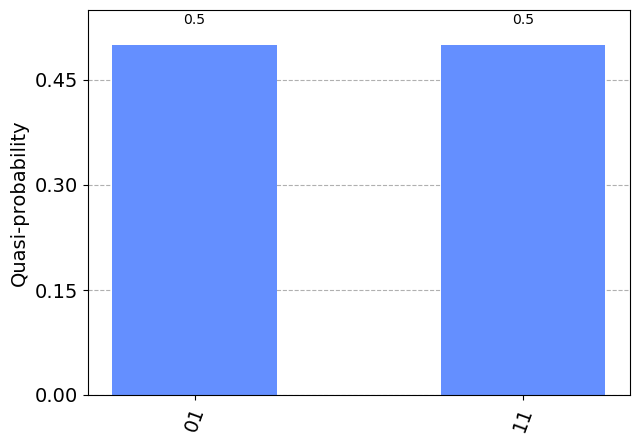

In [15]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

results = Sampler().run(circ).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

However, this is not what we get from actually quantum computation. Our computation will be noisy or prone to errors due to various interaction of the quantum computers with the surrounding. To demonstrate this let us use an noisy simulator of a quantum computer backend. 

Let's consider Fake noisy backend quito which has 5 qubit layout geometry as shown below.  

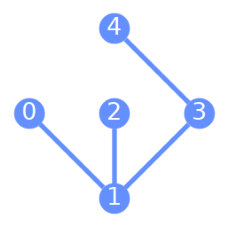

In [17]:
from qiskit.providers.fake_provider import FakeQuitoV2
from qiskit.visualization import plot_gate_map, plot_error_map, plot_histogram
backend = FakeQuitoV2()
plot_gate_map(backend)


The error map of this quantum chip is shown below. You don't need to understand what kind of errors these are but just to give you an idea that any operation or measurement or initial state preparation can produce error in the circuit leading incorrect resutls of the circuit. 

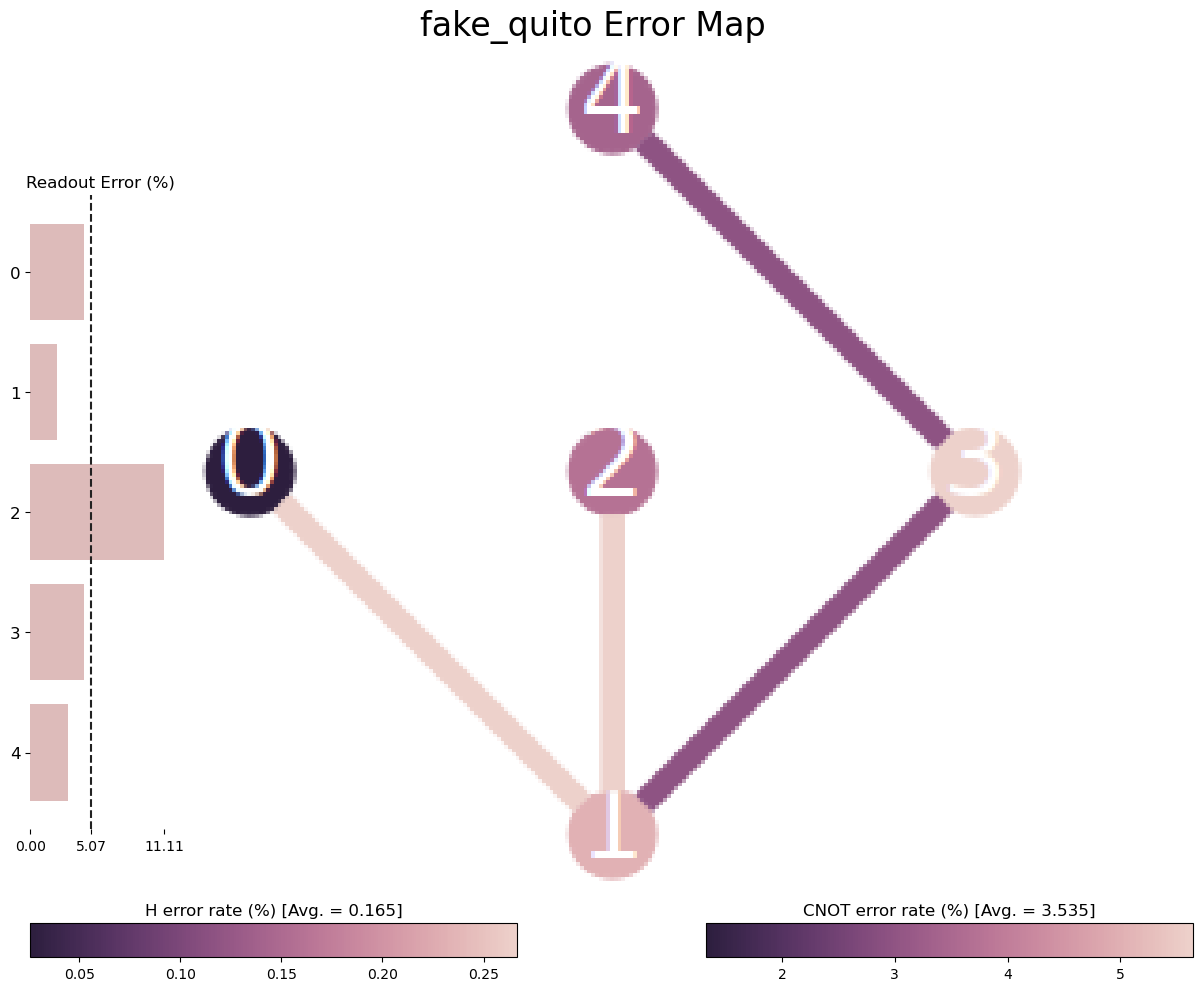

In [18]:
plot_error_map(backend)

Let us run our circuit above on this noisy backend. To overcome the statistical errors the measurements are performed many times given by the parameter "shots".

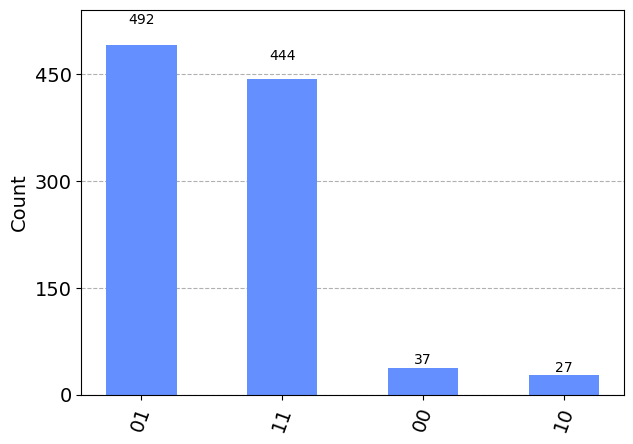

In [19]:
shots = 1000
count_noisy_Zbasis =backend.run(circ, shots=shots).result().get_counts()
plot_histogram(count_noisy_Zbasis,sort='value_desc')

Now, one can observe the you got some finite counts of the states $|00\rangle$ and $|10\rangle$ as well which should not be there if the quantum operations were applied correctly. 

Another important aspect of these backends is that one can transpile the circuit into the native gate sets of each backend. It is used to reduce the number of quantum operation/gates as not every quantum gate is applied directly. Some of the gates needs to decomposed into the native gates of the backend. So, after transpiling the circuit may appear different with different applied gates such as shown below

In [23]:
circ = QuantumCircuit(2)
# X gate is applied on the q1
circ.x(0)
# H gate is applied on the q0
circ.h(1)
# Cnot gate applied with control qubit as q0 and target qubit as q1
circ.cx(0,1)
# Here all qubits are measured in Z basis into classical registers 
circ.measure_all()
# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled = transpile(circ, backend)
transpiled.draw()

global phase: π/4
                  ┌───┐                          ░ ┌─┐   
      q_0 -> 0 ───┤ X ├──────────────────────■───░─┤M├───
               ┌──┴───┴──┐┌────┐┌─────────┐┌─┴─┐ ░ └╥┘┌─┐
      q_1 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├─░──╫─┤M├
               └─────────┘└────┘└─────────┘└───┘ ░  ║ └╥┘
ancilla_0 -> 2 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_1 -> 3 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_2 -> 4 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
       meas: 2/═════════════════════════════════════╩══╩═
                                                    0  1

The "ancilla" labeled qubits are the unused qubits in 5-qubit Quito quantum device. One can obeserve that $H$ gate has been replaced with Rz ($\equiv$ Rotation about Z) and Sx ($\equiv\sqrt{X}$) gates which are in the native gate set of the backend.